# Exploratory Data Analysis


## 1. Setup


### 1.1 Imports


In [1]:
from scripts.data_loader import *
from scripts.preprocessor import *
from scripts.feature_analysis import *

### 1.2 Loading Dataset


In [2]:
# Load data into DataFrames.
data = load_data("data")
df = remove_fillers(data)
df = fill_missing(df, "mean")
df = set_types(
    df,
    {
        "x": int,
        "y": int,
        "year": int,
        "ice_mask": int,
    },
)
print(f"📊 Data: \n {df.head()}\n")
features, targets = split_features_targets(df)
boundary_conditions = ["precipitation", "air_temperature", "ocean_temperature"]

📊 Data: 
          x        y  ice_thickness  ice_velocity  ice_mask  precipitation  \
0 -3040000  3040000            0.0     85.009021         4     729.484314   
1 -2918400  3040000            0.0     85.009021         4     694.645996   
2 -2796800  3040000            0.0     85.009021         4     691.841736   
3 -2675200  3040000            0.0     85.009021         4     679.350647   
4 -2553600  3040000            0.0     85.009021         4     659.845520   

   air_temperature  ocean_temperature  year  
0       292.419525              275.5  2015  
1       273.800354              275.5  2015  
2       273.366791              275.5  2015  
3       272.888672              275.5  2015  
4       272.373596              275.5  2015  



## 2. Feature Space


### 2.1 NaN Values


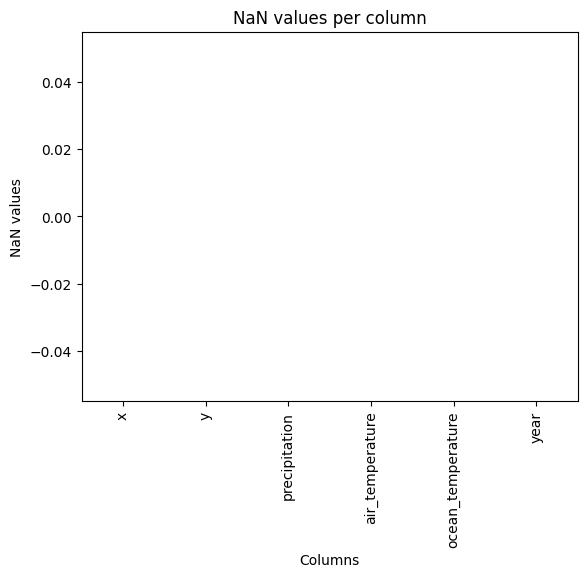

📊 NaN values per column: 
 x                    0
y                    0
precipitation        0
air_temperature      0
ocean_temperature    0
year                 0
dtype: int64



In [3]:
# Plot NaN values in each column
NaN_values = features.isna().sum()
sns.barplot(x=NaN_values.index, y=NaN_values.values)
plt.xticks(rotation=90)
plt.title("NaN values per column")
plt.xlabel("Columns")
plt.ylabel("NaN values")
plt.show()

print(f"📊 NaN values per column: \n {features.isna().sum()}\n")

### 2.2 Outliers


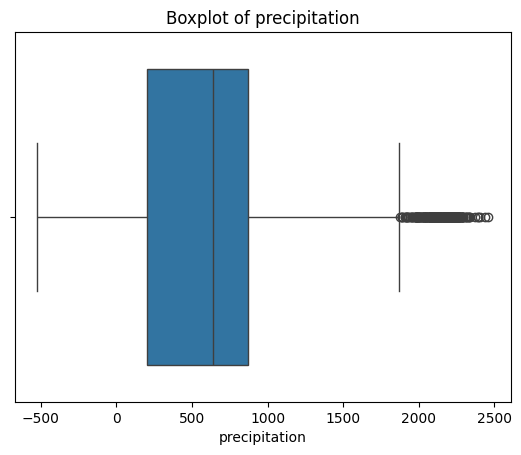

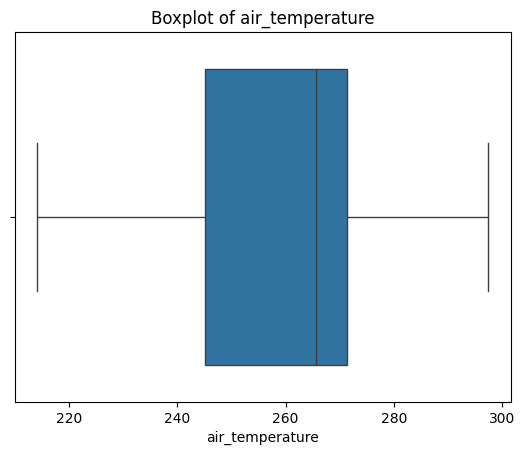

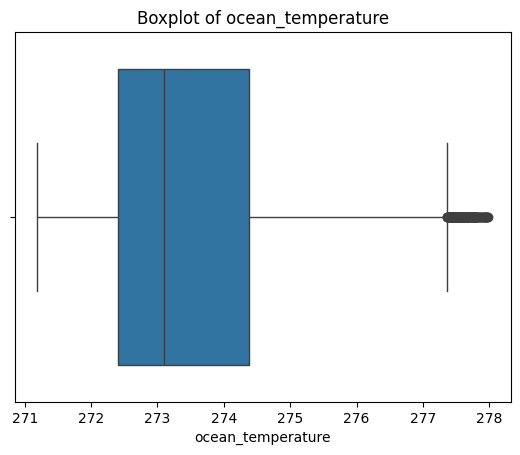

In [4]:
# plot a boxplot for each feature with seaborn
for feature in boundary_conditions:
    plot_boxplot(df, feature)

### 2.3 Duplicates


In [5]:
print(f"📊 Duplicates: {df.duplicated().sum()}")

📊 Duplicates: 0


### 2.4 Univariate Analysis


📊
precipitation
819.790344    3
990.931152    3
623.367188    3
792.231812    3
653.311707    3
             ..
199.594467    1
146.790909    1
96.361366     1
72.099937     1
939.561768    1
Name: count, Length: 222683, dtype: int64



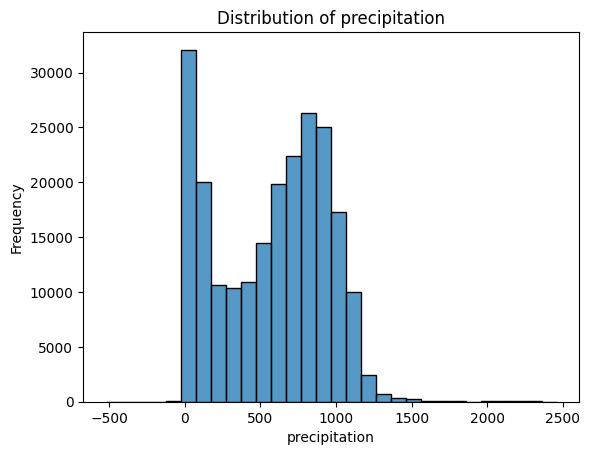

📊
air_temperature
267.263824    5
266.575928    5
267.067657    5
275.119934    5
266.871582    5
             ..
266.148804    1
265.933105    1
266.097260    1
268.920746    1
295.049957    1
Name: count, Length: 204118, dtype: int64



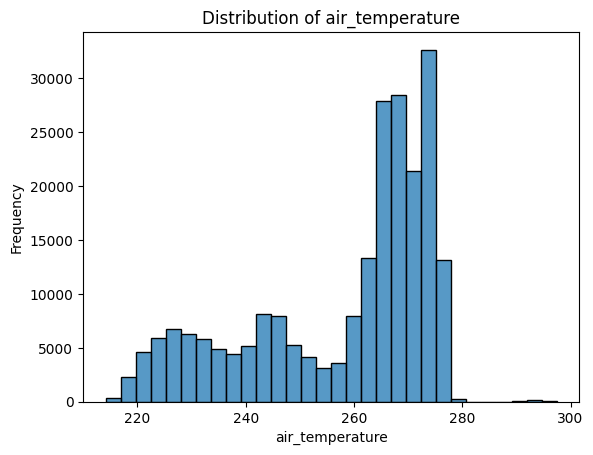

📊
ocean_temperature
275.500000    29585
272.445190       11
272.402008       10
272.751465       10
272.734894       10
              ...  
273.923431        1
274.323822        1
274.651764        1
274.454224        1
273.690125        1
Name: count, Length: 96719, dtype: int64



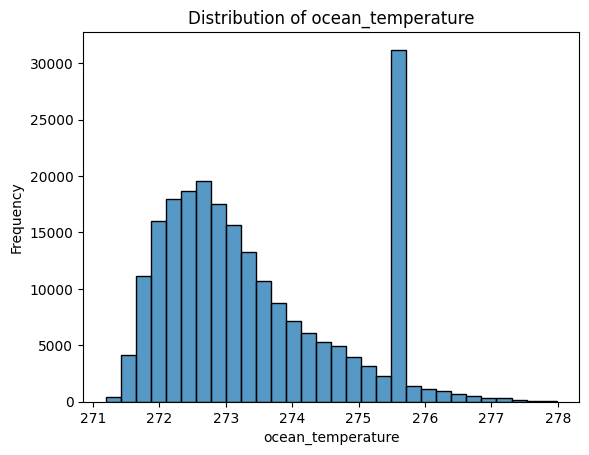

In [6]:
for column in boundary_conditions:
    plot_histogram(df, column)

📊
ice_thickness
0.000000       142451
2412.662842         3
3140.890869         3
2930.014648         3
2922.480469         3
                ...  
2664.730469         1
2557.804932         1
2566.216064         1
3746.208252         1
678.922079          1
Name: count, Length: 80910, dtype: int64



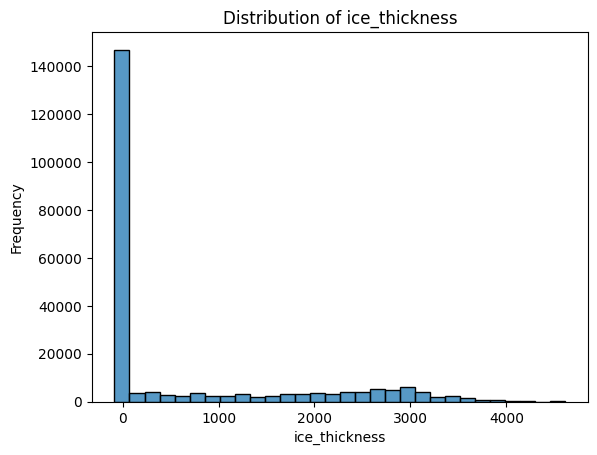

📊
ice_velocity
85.009021      144852
0.000000           28
1.899704            2
9.205718            2
4.601454            2
                ...  
31.310682           1
53.644230           1
62.764286           1
486.217010          1
1144.581909         1
Name: count, Length: 78766, dtype: int64



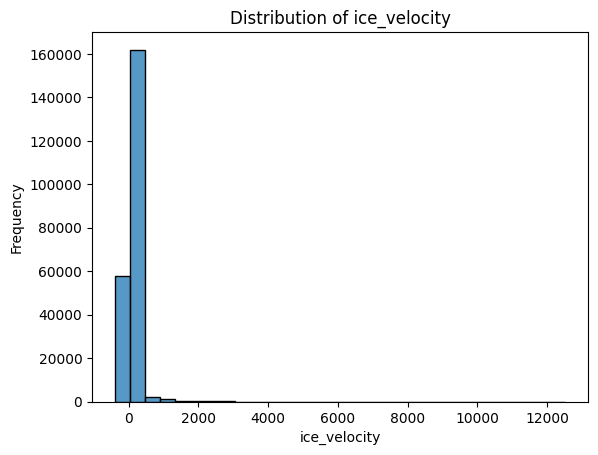

📊
ice_mask
4    143706
2     71595
3      6606
1      1635
0       144
Name: count, dtype: int64



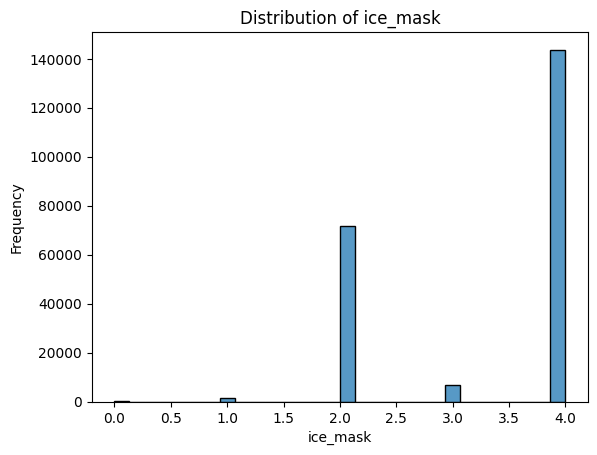

In [7]:
for column in targets.columns:
    plot_histogram(df, column)

### 2.5 Static Spatial Representations


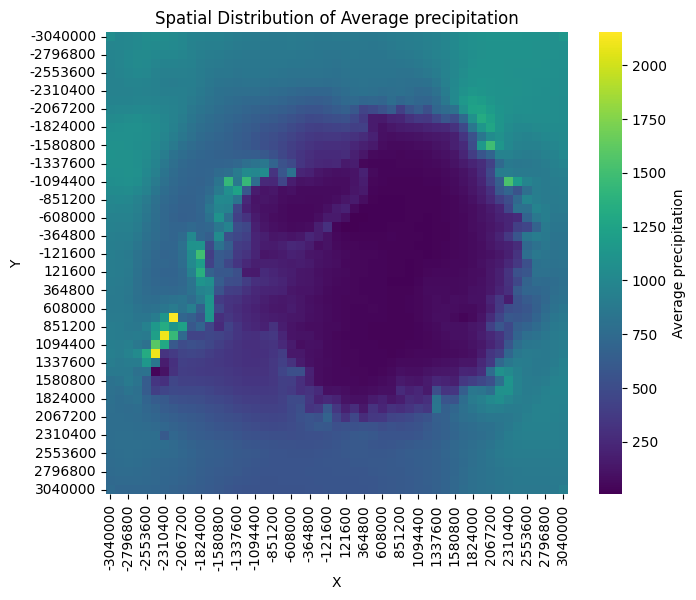

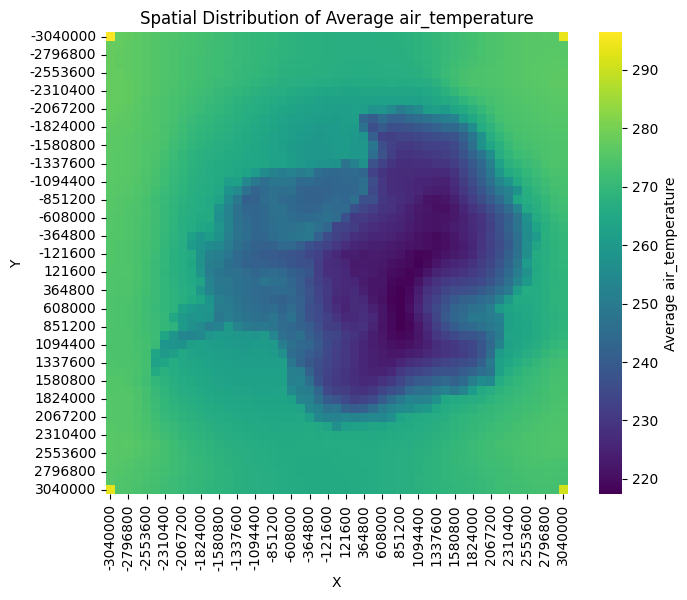

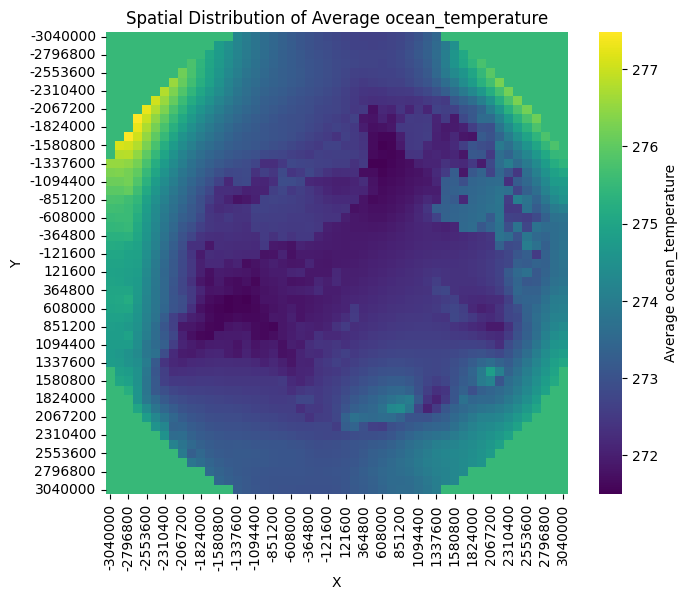

In [8]:
for column in boundary_conditions:
    plot_spatial_heatmap(df, column)

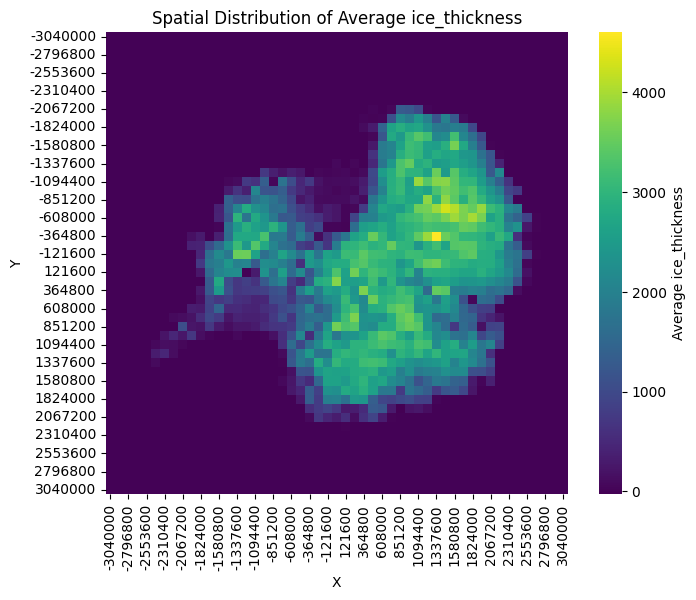

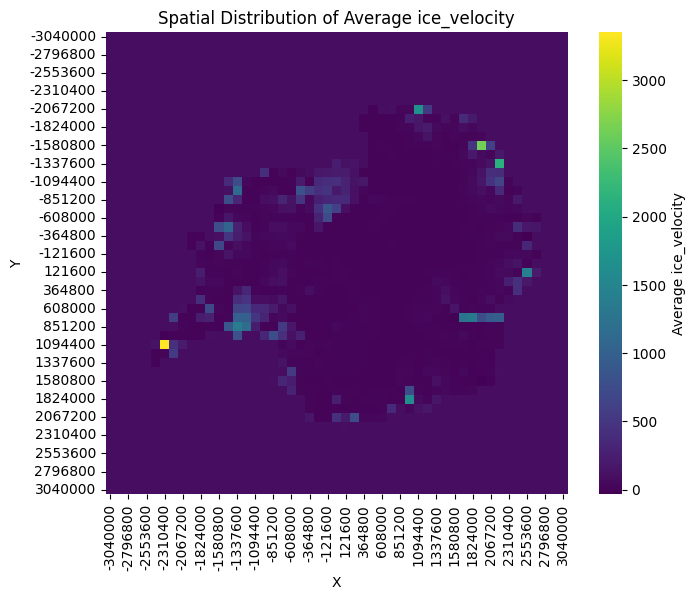

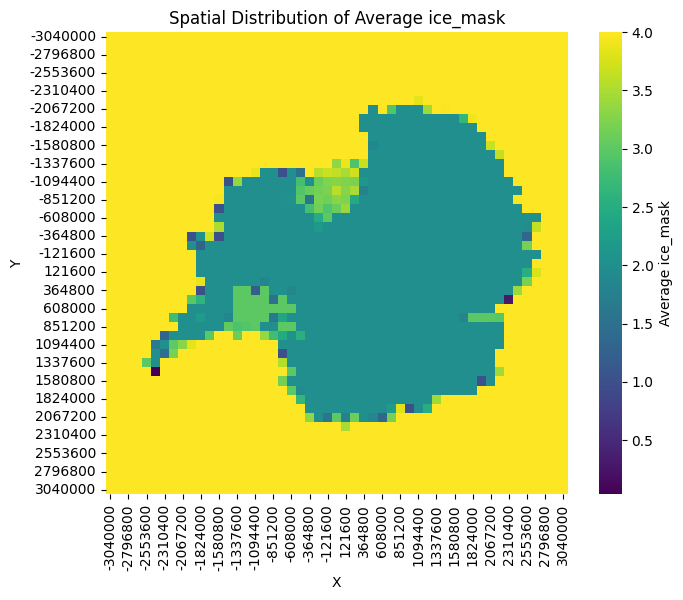

In [9]:
for column in targets.columns:
    plot_spatial_heatmap(df, column)

### 2.6 Dynamic Spatial Representations


In [10]:
for column in boundary_conditions:
    create_heatmap_gif(df, column)

In [11]:
for column in targets.columns:
    create_heatmap_gif(df, column)

### 2.7 Temporal Representations


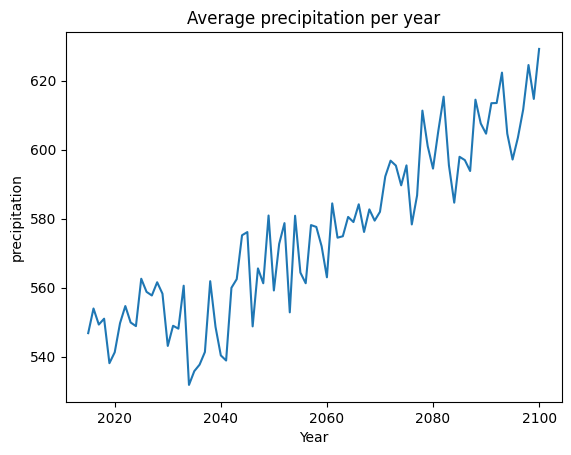

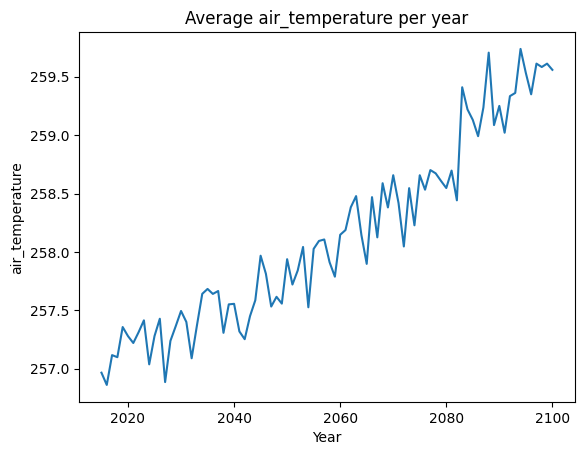

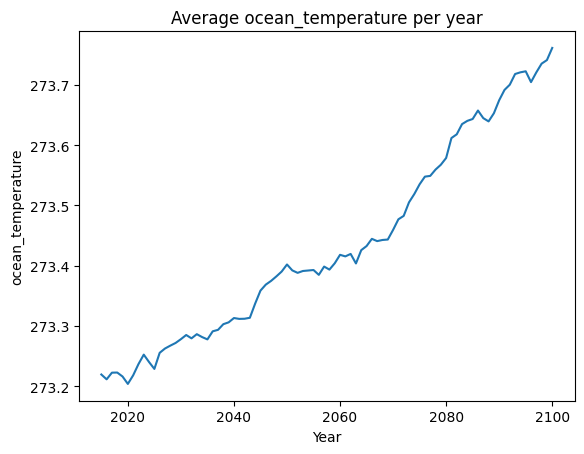

In [12]:
for feature in boundary_conditions:
    plot_line(df, feature)

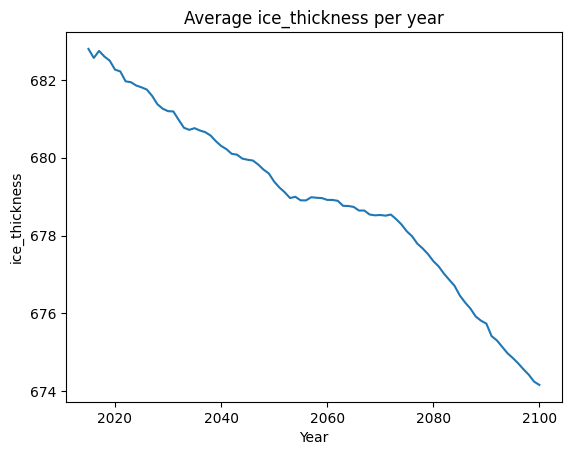

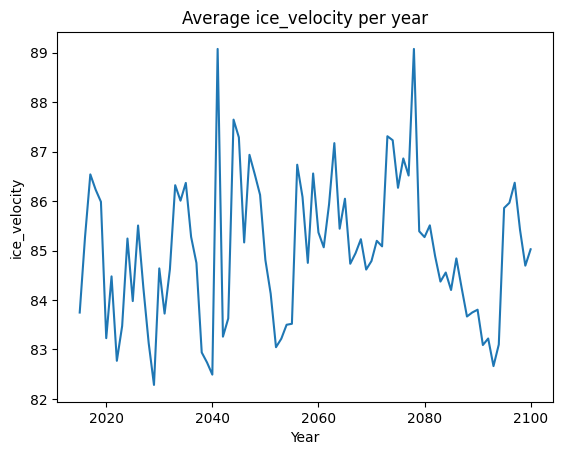

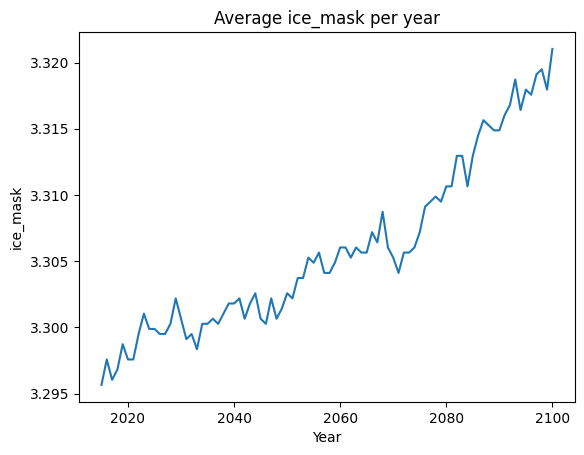

In [13]:
for target in targets.columns:
    plot_line(df, target)

## 3. Correlation Analysis


### 3.1 Bivariate Analysis _(Inter-Feature)_


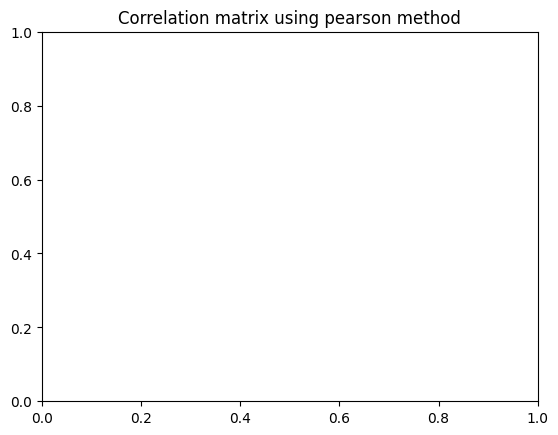

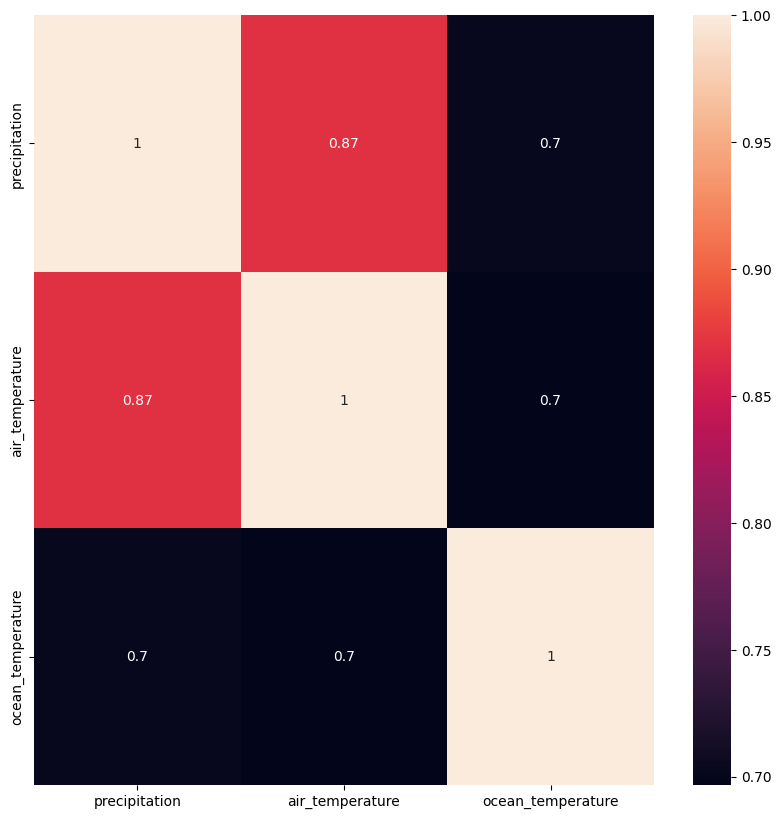

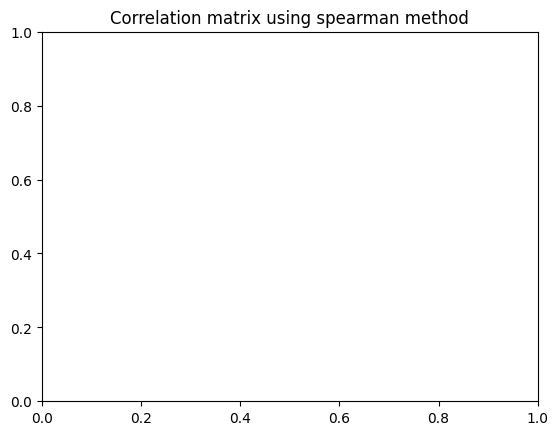

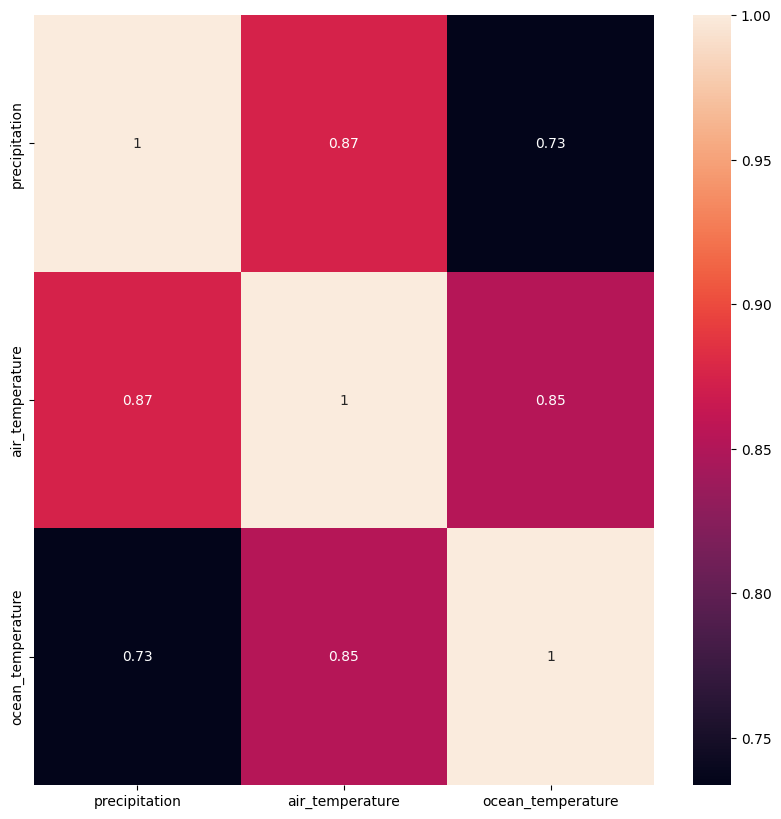

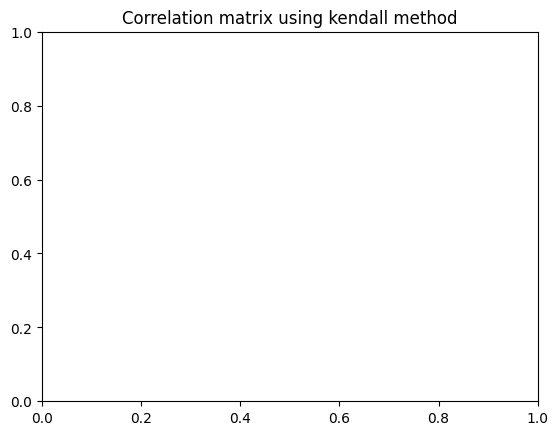

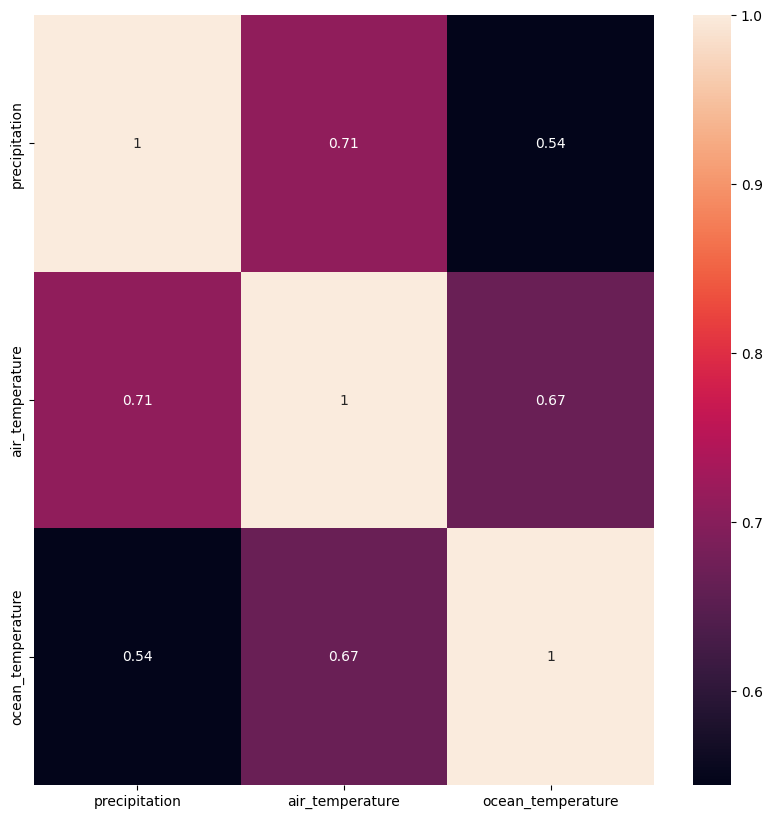

In [14]:
plot_correlation_heatmap(df[boundary_conditions])

### 3.2 Bivariate Analysis _(Feature-Output)_


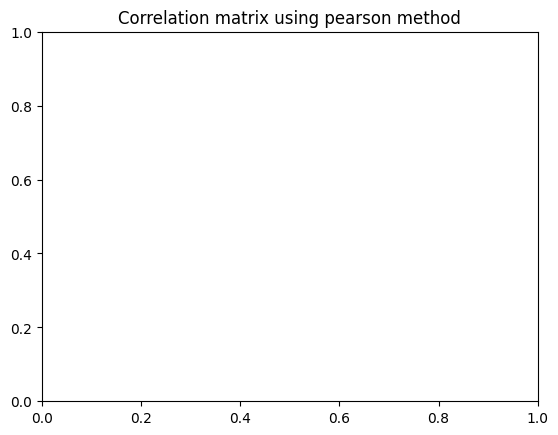

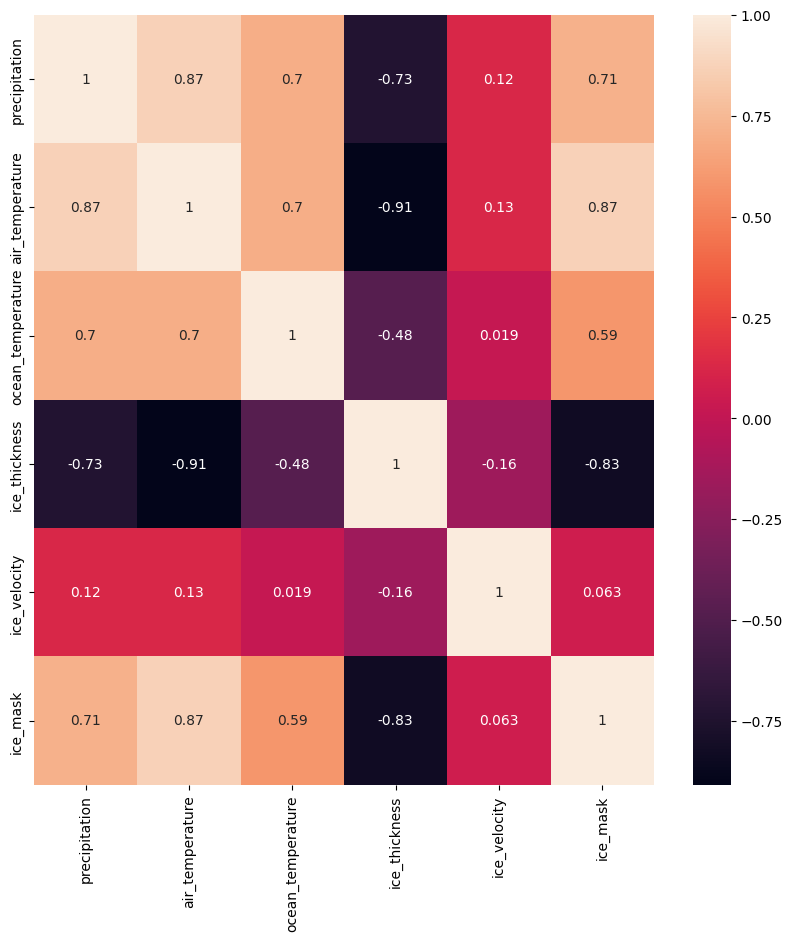

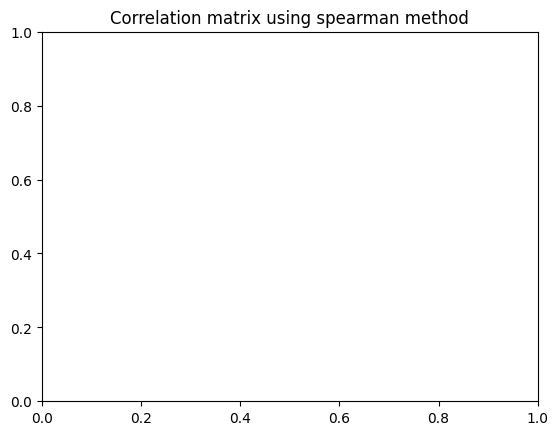

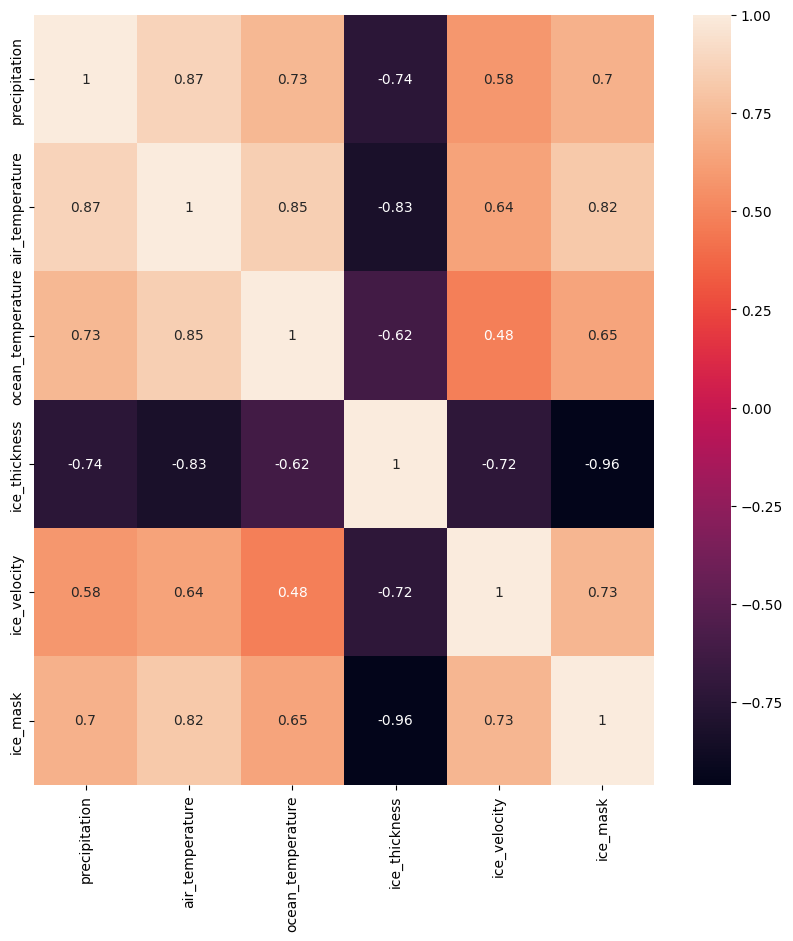

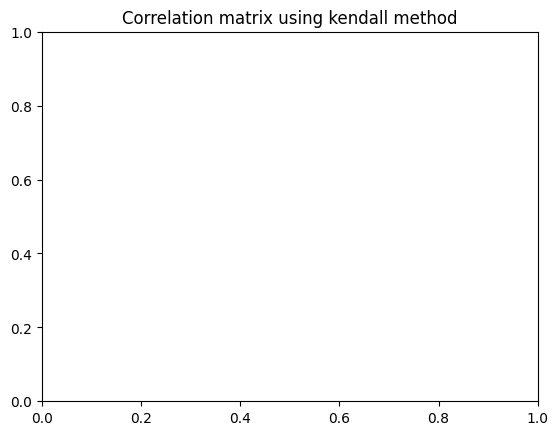

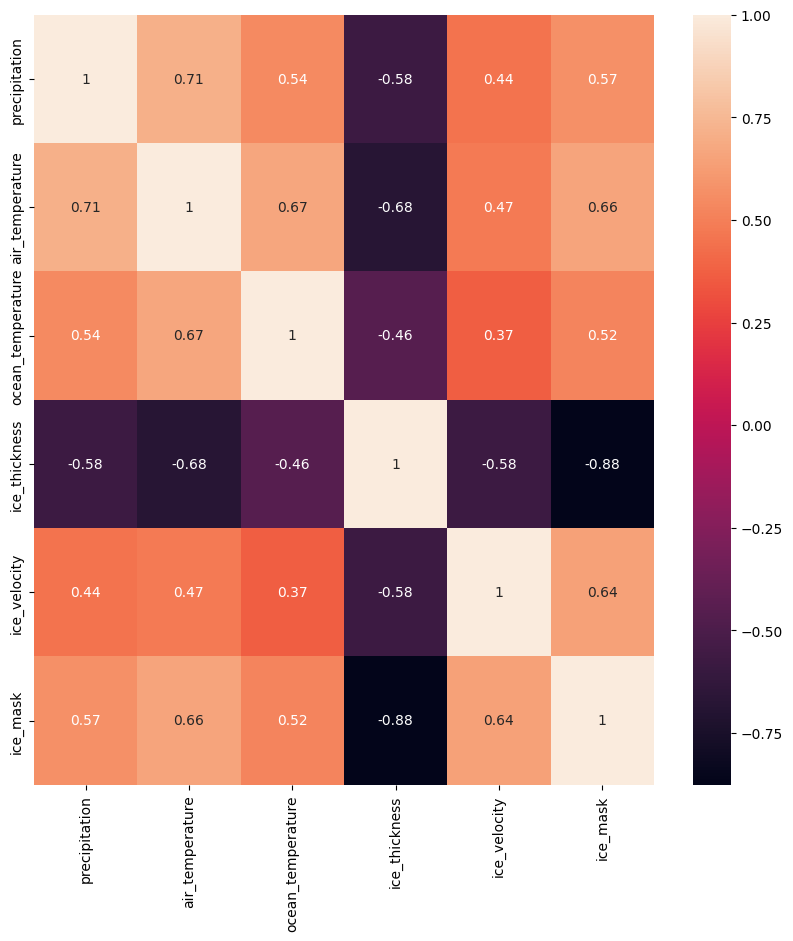

In [15]:
relevant_variables = boundary_conditions + targets.columns.tolist()
plot_correlation_heatmap(df[relevant_variables])

## 3. Feature Engineering


### 3.2 Feature Creation


In [16]:
created_features = []

#### Distance to Pole _(DTP)_


In [17]:
df["dtp"] = np.sqrt(df["x"] ** 2 + df["y"] ** 2)
created_features.append("dtp")

c:\Users\samma\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### Derivatives


In [18]:
for column in boundary_conditions:
    df[f"d{column}_dt"] = df[column].diff()
    df.at[0, f"d{column}_dt"] = 0
    created_features.append(f"d{column}_dt")

#### Integrals


In [19]:
for column in boundary_conditions:
    df[f"int_{column}"] = df[column].cumsum()
    created_features.append(f"int_{column}")

#### Air-Ocean Temperature Difference


In [20]:
df["temp_diff"] = df["air_temperature"] - df["ocean_temperature"]
created_features.append("temp_diff")

#### One-Hot Encodings - Ocean & Iceless


In [21]:
df["iceless"] = df["ice_velocity"].apply(lambda x: 1 if x == -1 else 0)
created_features.append("iceless")
df["ocean"] = df["ice_thickness"].apply(lambda x: 1 if x == 0 else 0)
created_features.append("ocean")

### 3.3 Created Feature Analysis


In [22]:
df_created = df[created_features]
print(df_created.head())

            dtp  dprecipitation_dt  dair_temperature_dt  \
0  44223.583211           0.000000             0.000000   
1           NaN         -34.838318           -18.619171   
2           NaN          -2.804260            -0.433563   
3  10483.504757         -12.491089            -0.478119   
4           NaN         -19.505127            -0.515076   

   docean_temperature_dt  int_precipitation  int_air_temperature  \
0                    0.0         729.484314           292.419525   
1                    0.0        1424.130310           566.219879   
2                    0.0        2115.972046           839.586670   
3                    0.0        2795.322693          1112.475342   
4                    0.0        3455.168213          1384.848938   

   int_ocean_temperature  temp_diff  iceless  ocean  
0                  275.5  16.919525        0      1  
1                  551.0  -1.699646        0      1  
2                  826.5  -2.133209        0      1  
3                 11

### 3.4 Created Feature Correlation Analysis


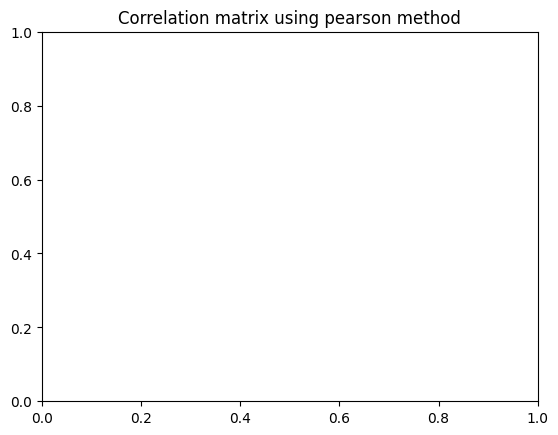

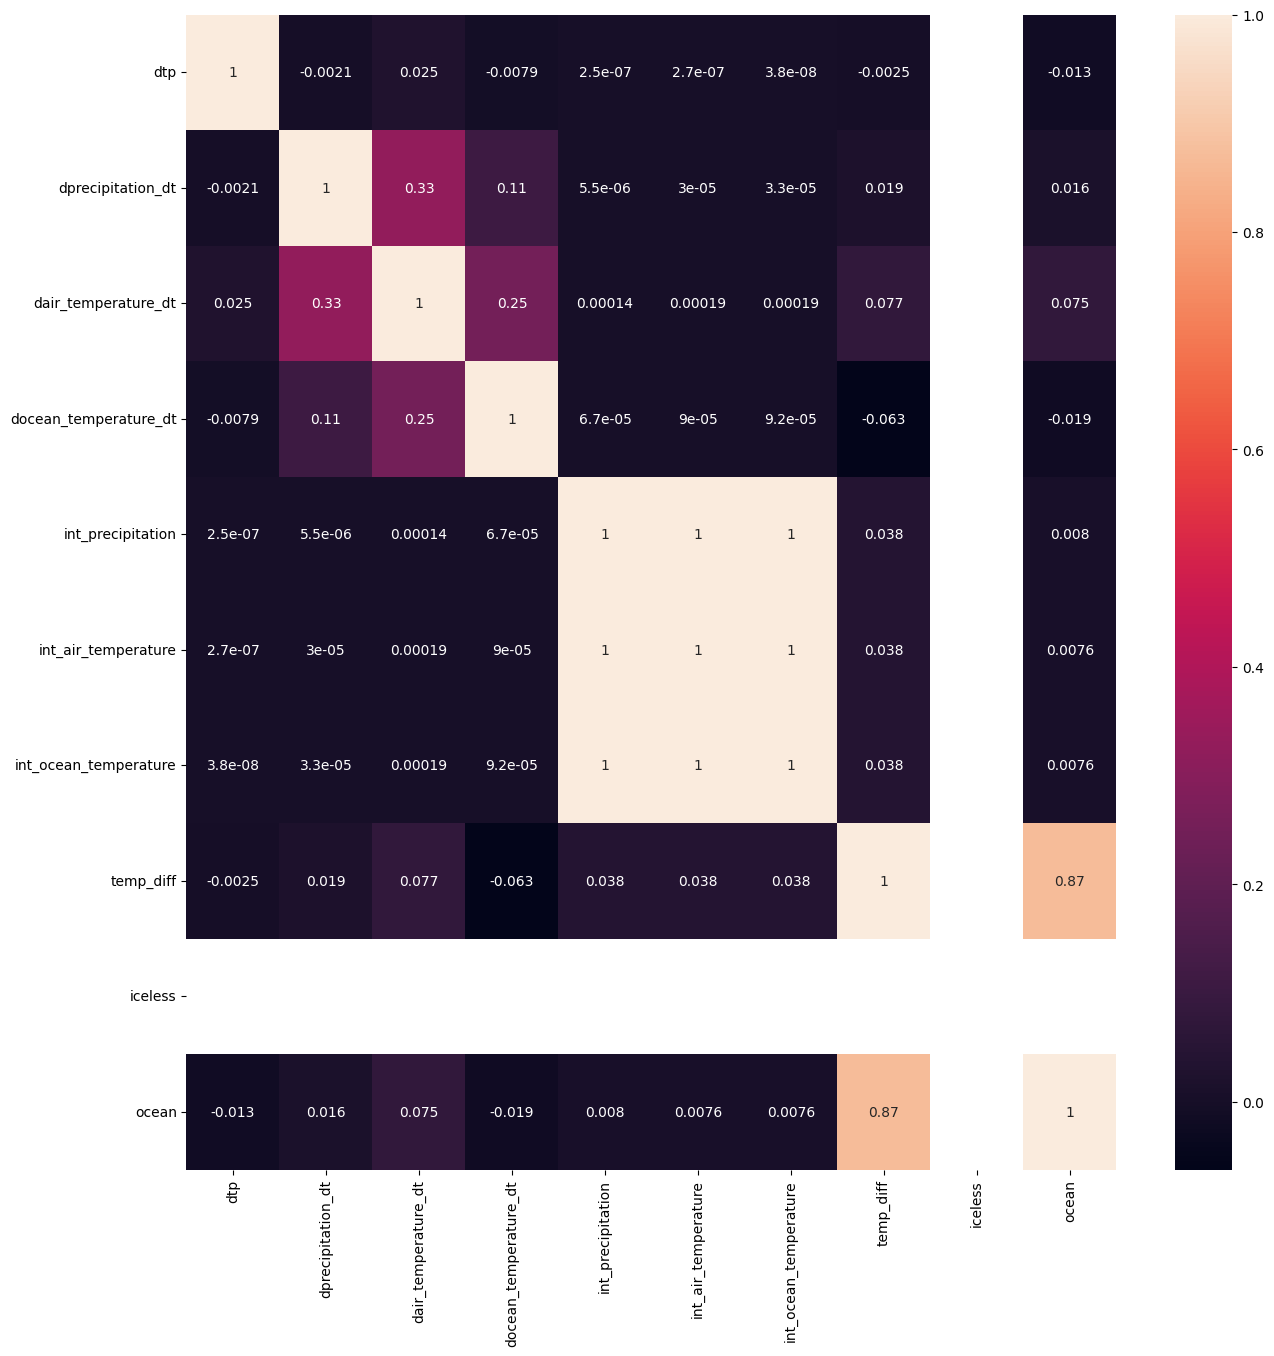

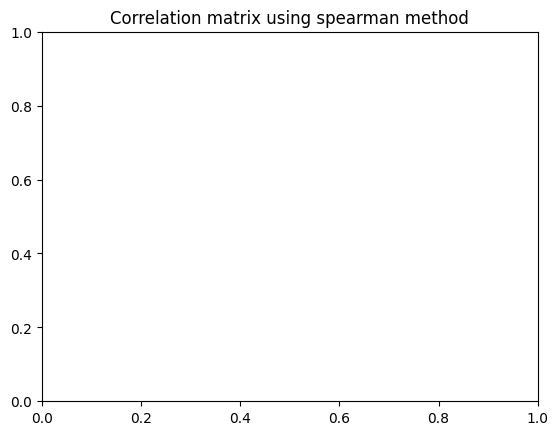

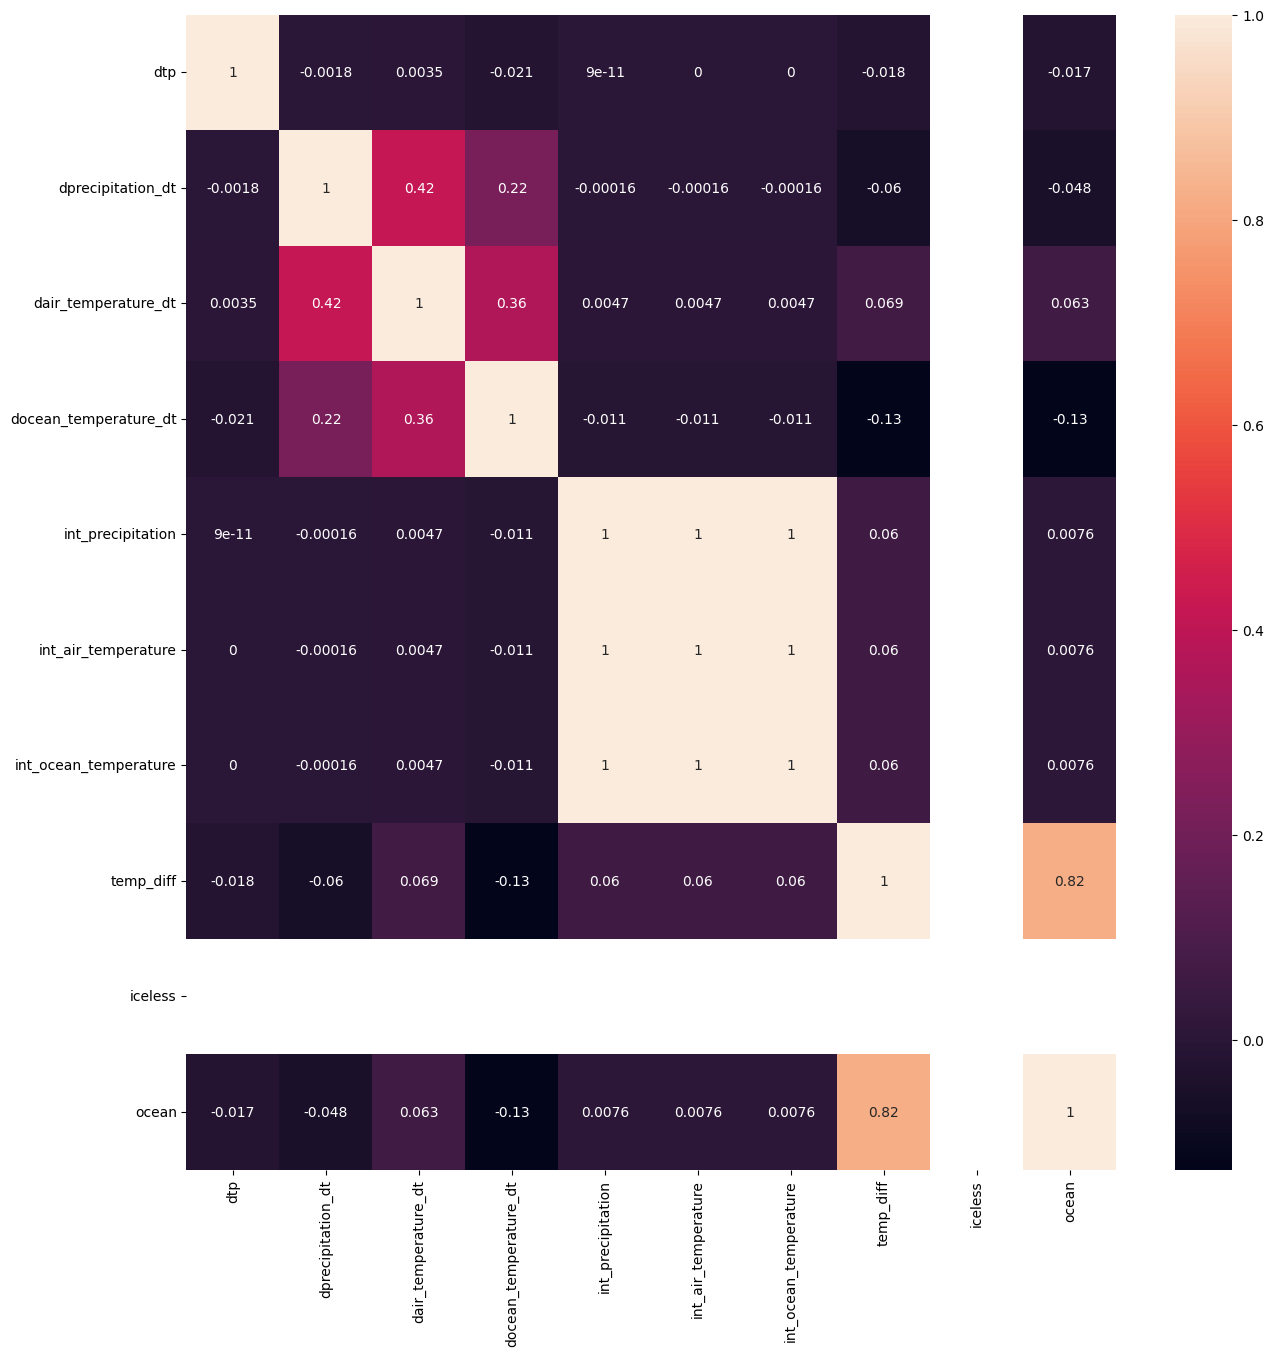

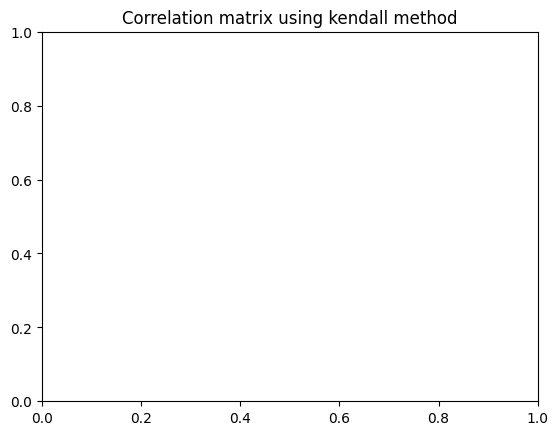

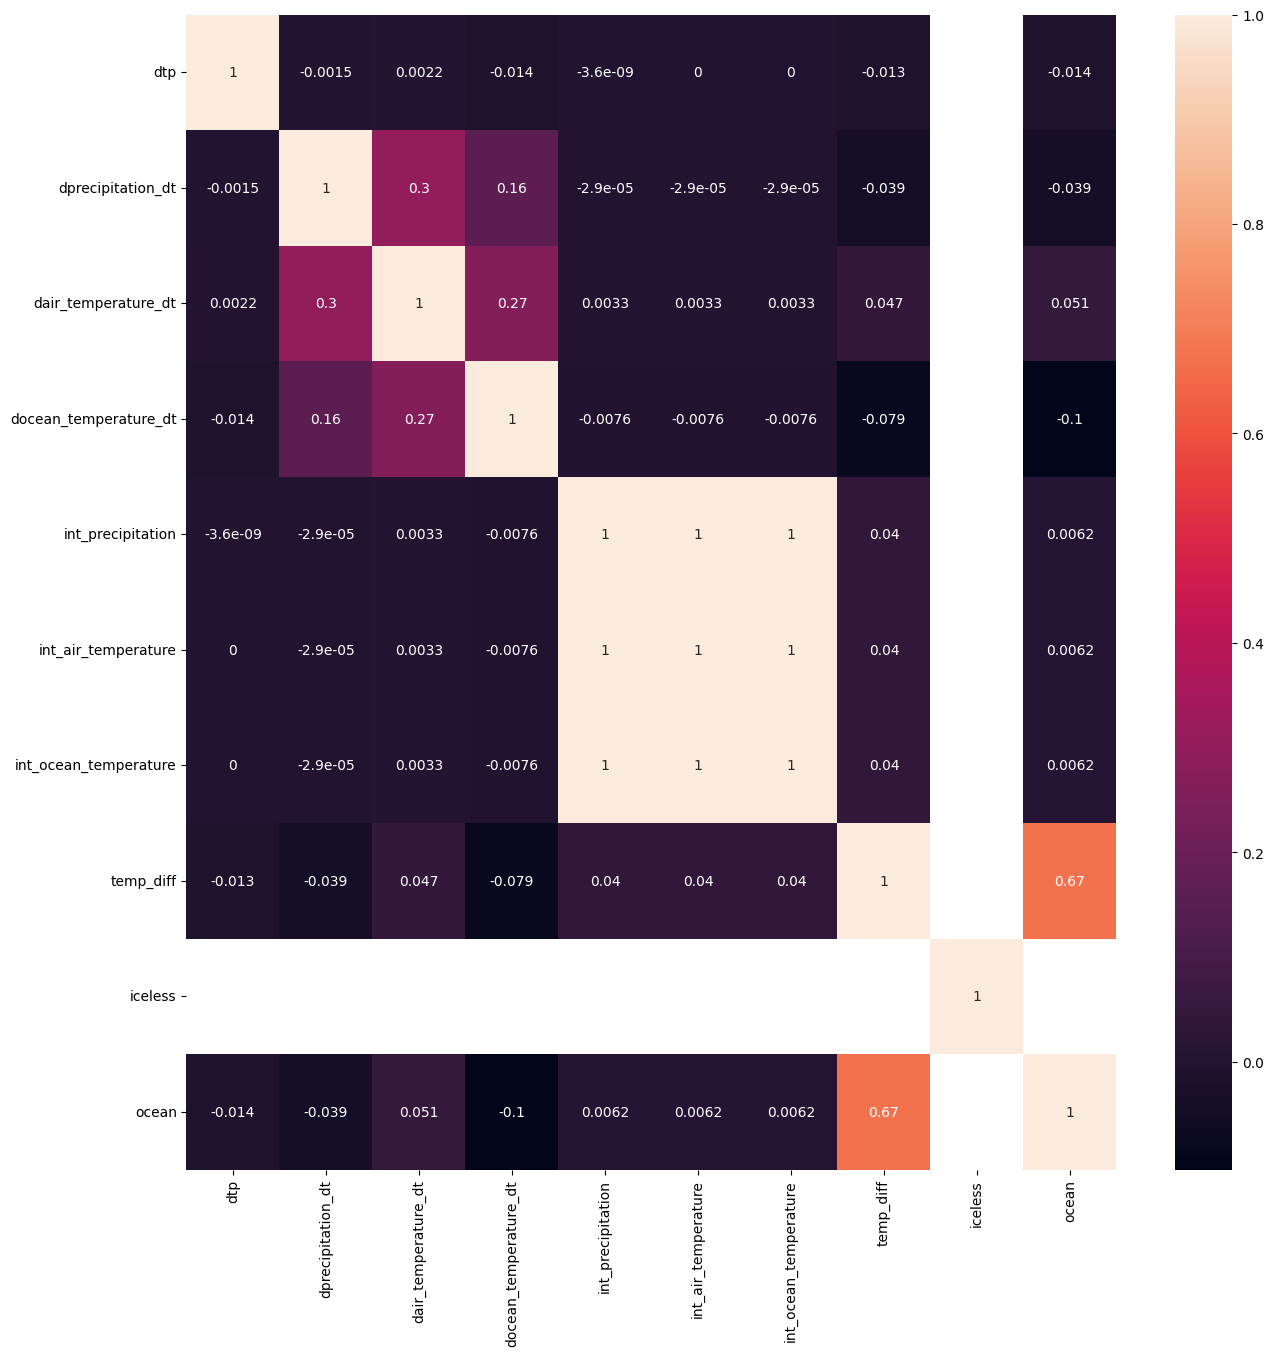

In [23]:
plot_correlation_heatmap(df_created, size=(20, 20))

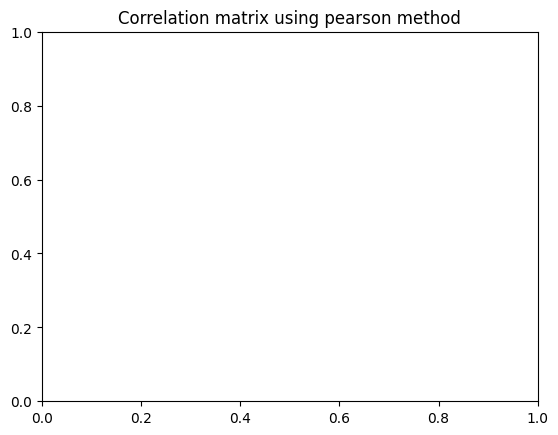

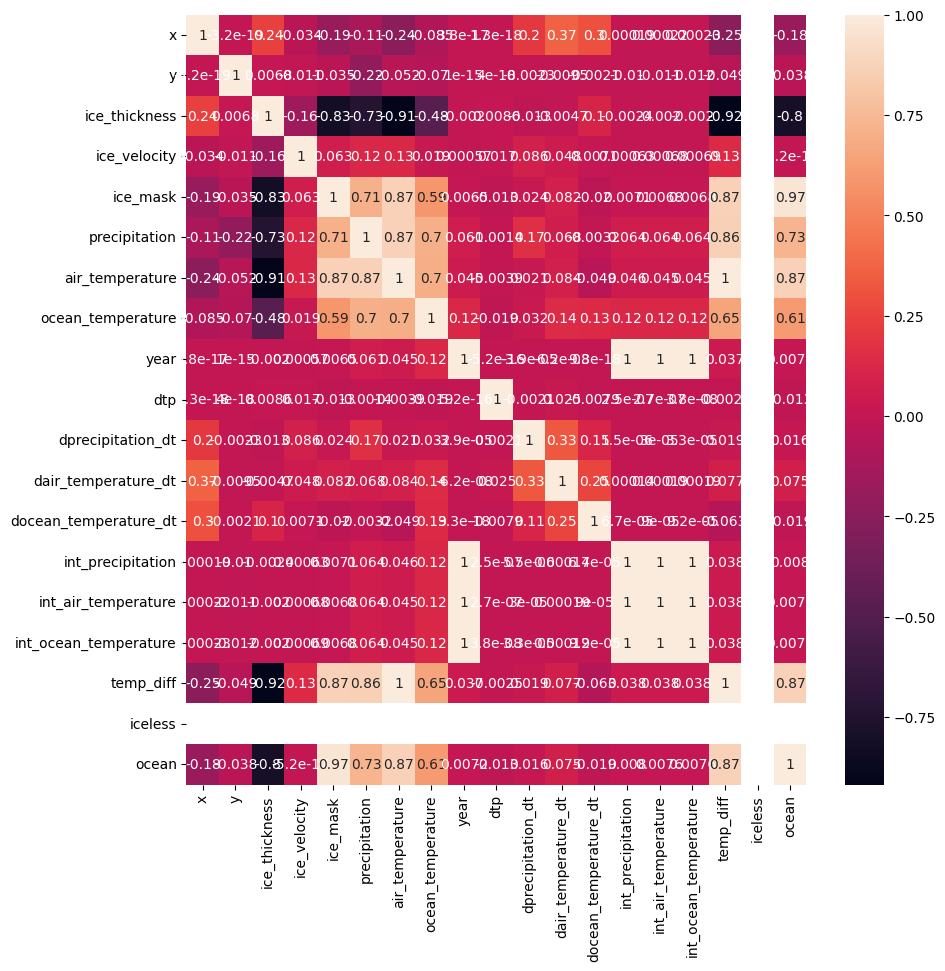

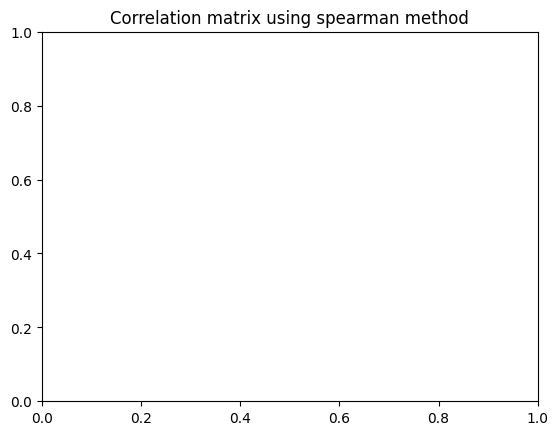

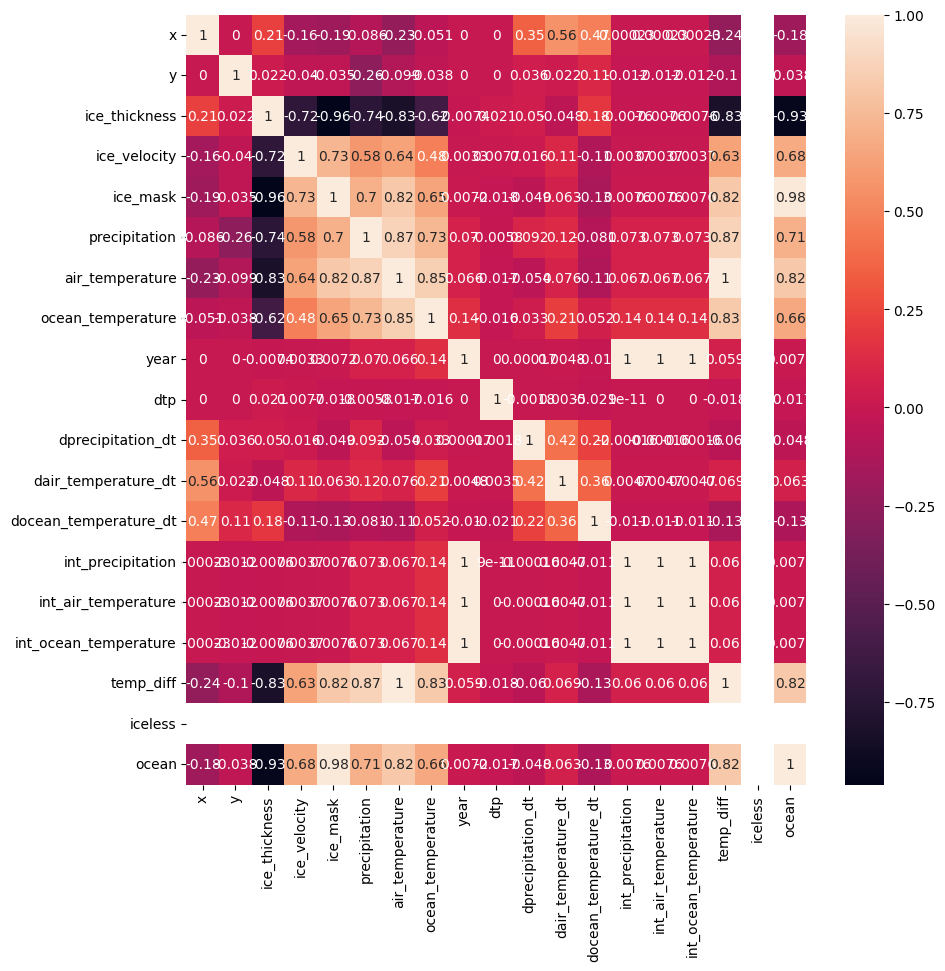

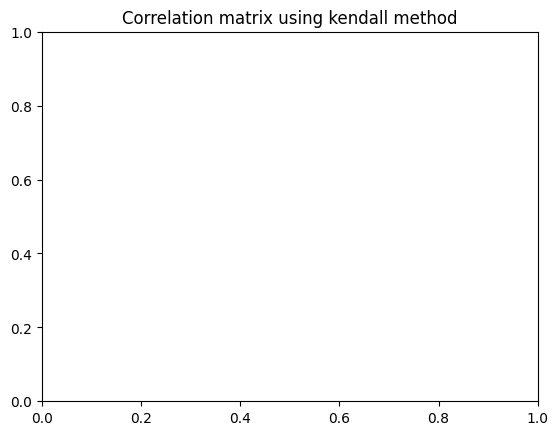

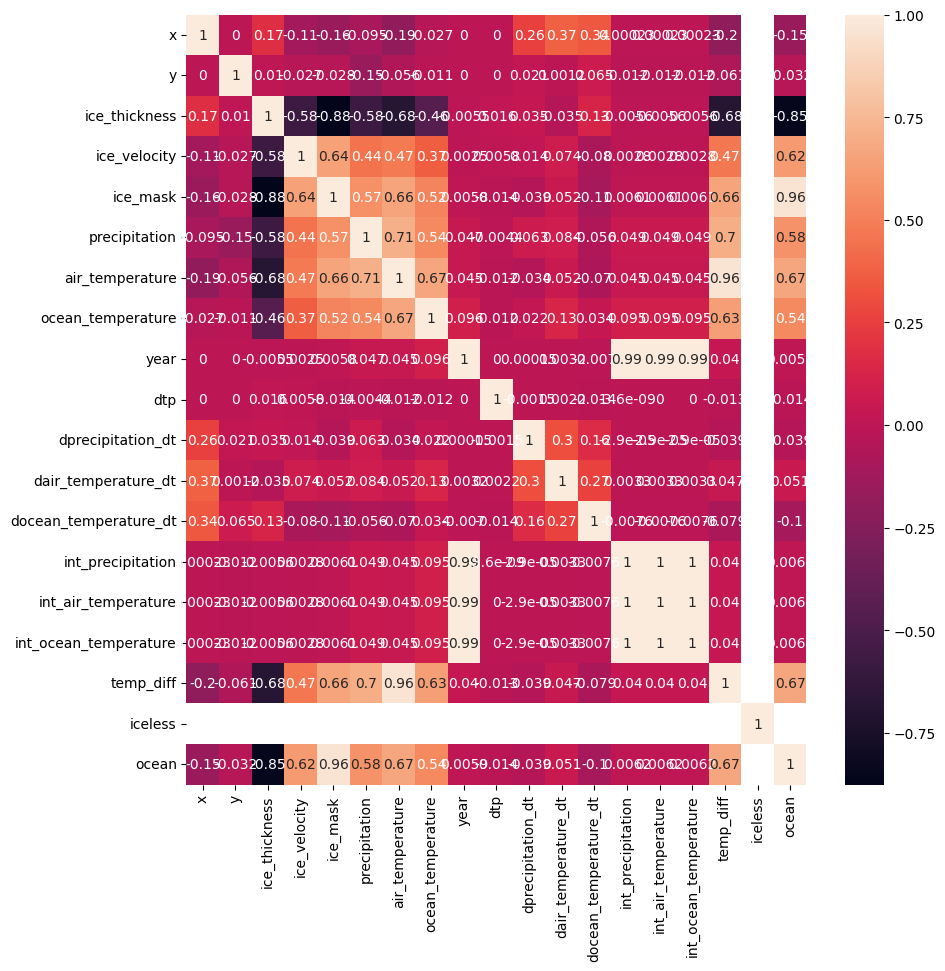

In [24]:
plot_correlation_heatmap(df)